#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [1]:
#import libraries 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

#import data
data_purchase = pd.read_csv('../Data/QVI_purchase_behaviour.csv')
data_transactions = pd.read_excel('../Data/QVI_transaction_data.xlsx')

In [2]:
#show first 5 rows
data_purchase.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [3]:
#data describe
data_purchase.describe()

,LYLTY_CARD_NBR
count,7.263700e+04
mean,1.361859e+05
std,8.989293e+04
min,1.000000e+03
25%,6.620200e+04
50%,1.340400e+05
75%,2.033750e+05
max,2.373711e+06


In [4]:
data_purchase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
LYLTY_CARD_NBR      72637 non-null int64
LIFESTAGE           72637 non-null object
PREMIUM_CUSTOMER    72637 non-null object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [5]:
data_purchase.shape

(72637, 3)

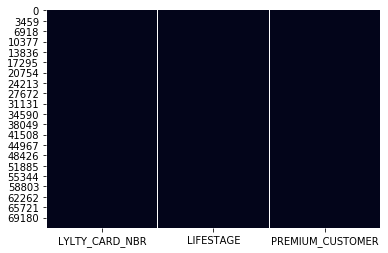

In [6]:
#check for missing values
sns.heatmap(data_purchase.isnull(), cbar=False)

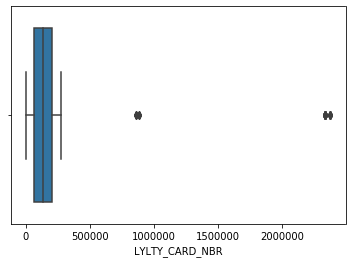

In [7]:
#check for outliers
sns.boxplot(x=data_purchase['LYLTY_CARD_NBR'])

In [8]:
data_transactions.head(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
5,43604,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1
6,43601,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7
7,43601,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.6
8,43332,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9
9,43330,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.2


In [9]:
data_transactions.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,43646.000000,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [10]:
data_transactions.shape

(264836, 8)

In [11]:
data_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
DATE              264836 non-null int64
STORE_NBR         264836 non-null int64
LYLTY_CARD_NBR    264836 non-null int64
TXN_ID            264836 non-null int64
PROD_NBR          264836 non-null int64
PROD_NAME         264836 non-null object
PROD_QTY          264836 non-null int64
TOT_SALES         264836 non-null float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


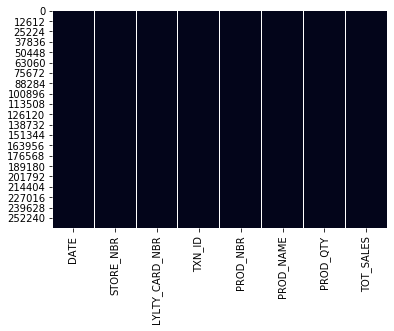

In [12]:
sns.heatmap(data_transactions.isnull(), cbar=False)

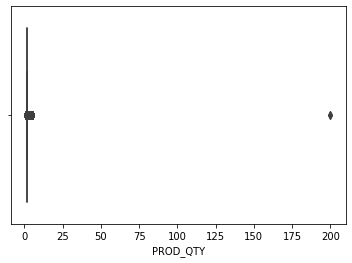

In [13]:
#check for outliers
sns.boxplot(x=data_transactions['PROD_QTY'])

In [14]:
import datetime as dt

dates_copy = data_transactions['DATE']
data_transactions['DATE'] = pd.TimedeltaIndex(dates_copy, unit='d') + dt.datetime(1899, 12, 30)

data_transactions['DATE']

0        2018-10-17
1        2019-05-14
2        2019-05-20
3        2018-08-17
4        2018-08-18
            ...    
264831   2019-03-09
264832   2018-08-13
264833   2018-11-06
264834   2018-12-27
264835   2018-09-22
Name: DATE, Length: 264836, dtype: datetime64[ns]

In [15]:
clean_spec_chars = data_transactions['PROD_NAME'].str.replace(r'[^\w\s]+', '')
weight = data_transactions['PROD_NAME'].str.extract('(\d+[gG])')
data_transactions.insert(6, 'WEIGHT', weight)

In [16]:
data_transactions['PROD_NAME'] = clean_spec_chars
prod_name = data_transactions['PROD_NAME'].str.replace(r'(\d+[gG])', '')
data_transactions['PROD_NAME'] = prod_name

In [17]:
data_transactions.head(20)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,WEIGHT,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly SCreamOnion,175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHnyJlpno Chili,150g,3,13.8
5,2019-05-19,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild,300g,1,5.1
6,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt Vinegar,330g,1,5.7
7,2019-05-16,4,4196,3539,24,Grain Waves Sweet Chilli,210g,1,3.6
8,2018-08-20,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno,150g,1,3.9
9,2018-08-18,7,7150,6900,52,Grain Waves Sour CreamChives,210G,2,7.2


In [18]:
weight = data_transactions['WEIGHT'].str.replace('g', '')
data_transactions['WEIGHT'] = weight
data_transactions.head(20)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,WEIGHT,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,175,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,175,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,170,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly SCreamOnion,175,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHnyJlpno Chili,150,3,13.8
5,2019-05-19,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild,300,1,5.1
6,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt Vinegar,330,1,5.7
7,2019-05-16,4,4196,3539,24,Grain Waves Sweet Chilli,210,1,3.6
8,2018-08-20,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno,150,1,3.9
9,2018-08-18,7,7150,6900,52,Grain Waves Sour CreamChives,210G,2,7.2


In [19]:
from collections import Counter

c = Counter(data_transactions['PROD_NAME'])
c.most_common()

[('Kettle Mozzarella   Basil  Pesto ', 3304),
 ('Kettle Tortilla ChpsHnyJlpno Chili ', 3296),
 ('Cobs Popd SwtChlli SrCream Chips ', 3269),
 ('Tyrrells Crisps     Ched  Chives ', 3268),
 ('Cobs Popd Sea Salt  Chips ', 3265),
 ('Kettle  Swt Pot Sea Salt', 3257),
 ('Tostitos Splash Of  Lime ', 3252),
 ('Infuzions Thai SweetChili PotatoMix ', 3242),
 ('Smiths Crnkle Chip  Orgnl Big Bag ', 3233),
 ('Thins Potato Chips  Hot  Spicy ', 3229),
 ('Kettle Sensations   Camembert  Fig ', 3219),
 ('Doritos Corn Chips  Cheese Supreme ', 3217),
 ('Pringles Barbeque   ', 3210),
 ('Doritos Corn Chip Mexican Jalapeno ', 3204),
 ('Kettle Sweet Chilli And Sour Cream ', 3200),
 ('Smiths Crinkle Chips Salt  Vinegar ', 3197),
 ('Thins Chips Light  Tangy ', 3188),
 ('Dorito Corn Chp     Supreme ', 3185),
 ('Pringles SweetSpcy BBQ ', 3177),
 ('Infuzions BBQ Rib   Prawn Crackers ', 3174),
 ('Tyrrells Crisps     Lightly Salted ', 3174),
 ('Kettle Sea Salt     And Vinegar ', 3173),
 ('Doritos Corn Chip Southern C

[Text(0, 0.5, 'PRODUCTS'),
 Text(0.5, 0, 'SOLD PRODUCTS'),
 Text(0.5, 1.0, 'BEST SELLERS')]

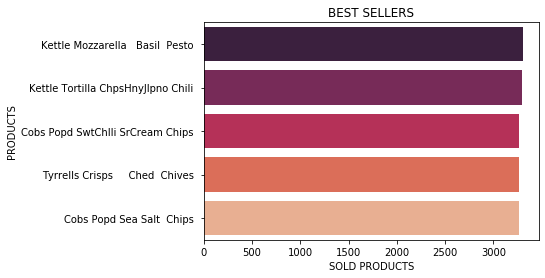

In [20]:
most_common = data_transactions.groupby(['PROD_NAME']).agg(SALE = ('TOT_SALES', 'count')).sort_values(by='SALE', ascending=False).reset_index()

most_common = most_common[:5]
most_common
most_common_vis = sns.barplot(data = most_common, x='SALE', y='PROD_NAME', palette="rocket")
most_common_vis.set(xlabel='SOLD PRODUCTS', ylabel='PRODUCTS', title = 'BEST SELLERS')

In [21]:
#we only need chips products so we drop salsa products
data_transactions.drop(data_transactions[data_transactions['PROD_NAME'].str.contains('salsa', case = False)].index, inplace=True)

In [22]:
data_transactions.sort_values(by=['PROD_QTY'], ascending=False)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,WEIGHT,PROD_QTY,TOT_SALES
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme,380,200,650.0
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme,380,200,650.0
135225,2019-05-15,46,46296,42138,81,Pringles Original Crisps,134,5,18.5
69523,2019-05-15,71,71142,69852,96,WW Original Stacked Chips,160,5,9.5
69502,2018-08-18,55,55144,49328,44,Thins Chips Light Tangy,175,5,16.5
...,...,...,...,...,...,...,...,...,...
150883,2018-08-14,184,184055,186586,107,Smiths Crinkle Cut French OnionDip,150,1,2.6
150885,2019-05-17,184,184152,187227,28,Thins Potato Chips Hot Spicy,175,1,3.3
29682,2018-12-04,174,174004,174974,114,Kettle Sensations Siracha Lime,150,1,4.6
150887,2019-05-17,184,184205,187584,13,Red Rock Deli Thai ChilliLime,150,1,2.7


In [23]:
#this customer is not retail ordinary customer, so we delete his loyality card number as he cause outliers
data_purchase.drop(data_purchase[data_purchase['LYLTY_CARD_NBR'] == 226000].index, inplace=True)
data_transactions.drop(data_transactions[data_transactions['LYLTY_CARD_NBR'] == 226000].index, inplace=True)

In [24]:
grouped_trans = data_transactions.groupby('DATE').count().sort_values('DATE')
grouped_trans

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,WEIGHT,PROD_QTY,TOT_SALES
DATE,,,,,,,,
2018-07-01,663,663,663,663,663,663,663,663
2018-07-02,650,650,650,650,650,650,650,650
2018-07-03,674,674,674,674,674,674,674,674
2018-07-04,669,669,669,669,669,669,669,669
2018-07-05,660,660,660,660,660,660,660,660
...,...,...,...,...,...,...,...,...
2019-06-26,657,657,657,657,657,657,657,657
2019-06-27,669,669,669,669,669,669,669,669
2019-06-28,673,673,673,673,673,673,673,673


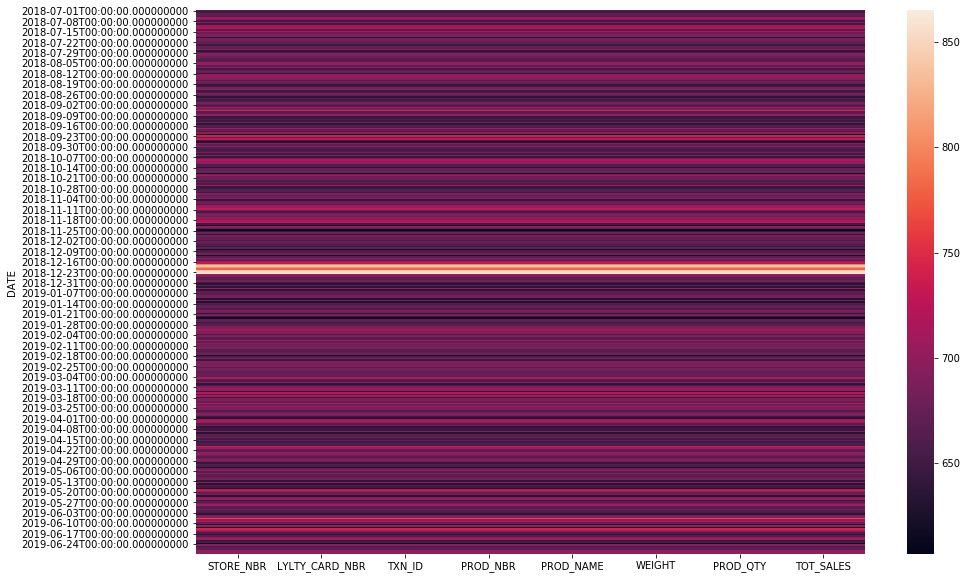

In [25]:
plt.figure(figsize=(15, 10))
sns.heatmap(grouped_trans)

In [29]:
#look closer to december dates
start_date = '2018-12-15'
end_date = '2018-12-31'

trans_range = data_transactions[data_transactions['DATE'].between(start_date, end_date)].sort_values('DATE')
grouped_trans_range = trans_range.groupby('DATE', as_index=False).count()
grouped_trans_range

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,WEIGHT,PROD_QTY,TOT_SALES
0,2018-12-15,671,671,671,671,671,671,671,671
1,2018-12-16,709,709,709,709,709,709,709,709
2,2018-12-17,729,729,729,729,729,729,729,729
3,2018-12-18,799,799,799,799,799,799,799,799
4,2018-12-19,839,839,839,839,839,839,839,839
5,2018-12-20,808,808,808,808,808,808,808,808
6,2018-12-21,781,781,781,781,781,781,781,781
7,2018-12-22,840,840,840,840,840,840,840,840
8,2018-12-23,853,853,853,853,853,853,853,853
9,2018-12-24,865,865,865,865,865,865,865,865


/home/entel/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


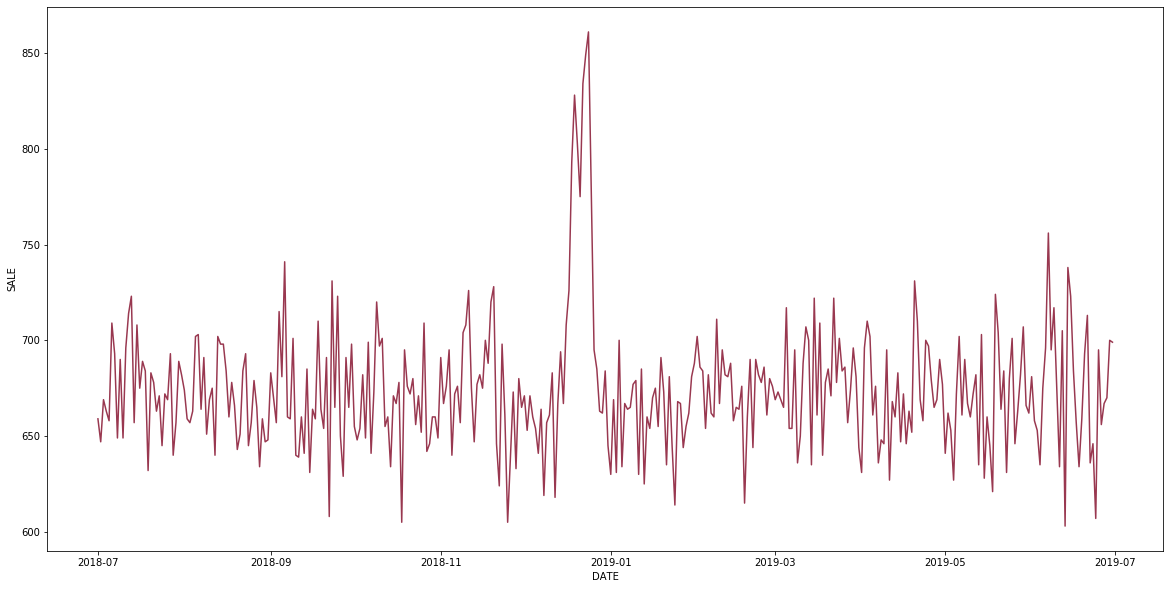

In [30]:
months = pd.DatetimeIndex(data_transactions['DATE']).month
data_transactions['MONTHS'] = months

trans_month = data_transactions.groupby(['DATE']).agg(SALE = ('TXN_ID', 'nunique')).reset_index()
trans_month

fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)

month_vis = sns.lineplot(data=trans_month, x = 'DATE', y = 'SALE', ax=ax, color='#993850')

In [31]:
data_transactions.rename(columns={'WEIGHT': 'PACK_SIZE'}, inplace = True)
data_transactions.sort_values('PACK_SIZE')

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PACK_SIZE,PROD_QTY,TOT_SALES,MONTHS
83181,2019-02-19,32,32199,29221,87,Infuzions BBQ Rib Prawn Crackers,110,2,7.6,2
69524,2018-08-19,71,71204,70275,75,Cobs Popd Sea Salt Chips,110,2,7.6,8
223424,2018-12-04,147,147091,146252,31,Infzns Crn Crnchers Tangy Gcamole,110,2,7.6,12
69536,2019-05-14,81,81230,80771,87,Infuzions BBQ Rib Prawn Crackers,110,1,3.8,5
69547,2019-05-19,87,87211,85978,87,Infuzions BBQ Rib Prawn Crackers,110,1,3.8,5
...,...,...,...,...,...,...,...,...,...,...
211294,2018-09-28,152,152202,151575,95,Sunbites Whlegrn Crisps FrchOnin,90,2,3.4,9
23264,2018-12-23,207,207118,205286,55,Snbts Whlgrn Crisps CheddrMstrd,90,2,3.4,12
89963,2019-02-13,128,128152,131533,55,Snbts Whlgrn Crisps CheddrMstrd,90,2,3.4,2
140434,2018-11-22,82,82334,81843,55,Snbts Whlgrn Crisps CheddrMstrd,90,2,3.4,11


In [32]:
pack_size = data_transactions['PACK_SIZE'].str.replace(r'([gG])', '')
data_transactions['PACK_SIZE'] = pack_size
data_transactions

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PACK_SIZE,PROD_QTY,TOT_SALES,MONTHS
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,175,2,6.0,10
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,175,3,6.3,5
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,170,2,2.9,5
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly SCreamOnion,175,5,15.0,8
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHnyJlpno Chili,150,3,13.8,8
...,...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream,175,2,10.8,3
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime,175,1,4.4,8
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana,170,2,8.8,11
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno,150,2,7.8,12


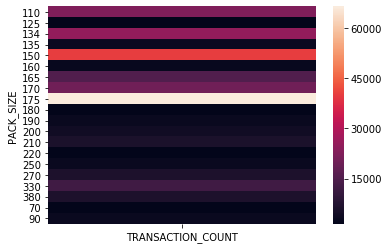

In [33]:
grouped_trans_psize = data_transactions.groupby('PACK_SIZE').agg(TRANSACTION_COUNT = ('PACK_SIZE', 'count'))
sns.heatmap(grouped_trans_psize)

[Text(0, 0.5, 'TRANSACTION COUNT'), Text(0.5, 0, 'PACK SIZE (g)')]

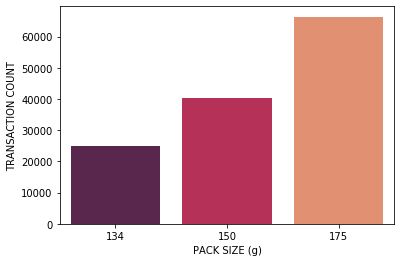

In [34]:
grouped_trans_psize2 = grouped_trans_psize.sort_values(by='TRANSACTION_COUNT', ascending = False).reset_index()[:3]
grouped_trans_psize_vis = sns.barplot(data = grouped_trans_psize2, x = 'PACK_SIZE', y = 'TRANSACTION_COUNT', palette = 'rocket')
grouped_trans_psize_vis.set(xlabel = 'PACK SIZE (g)', ylabel = 'TRANSACTION COUNT')

In [35]:
brands = data_transactions['PROD_NAME'].str.split().str.get(0)
data_transactions.insert(5, 'BRAND', brands)

In [36]:
data_transactions

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,BRAND,PROD_NAME,PACK_SIZE,PROD_QTY,TOT_SALES,MONTHS
0,2018-10-17,1,1000,1,5,Natural,Natural Chip Compny SeaSalt,175,2,6.0,10
1,2019-05-14,1,1307,348,66,CCs,CCs Nacho Cheese,175,3,6.3,5
2,2019-05-20,1,1343,383,61,Smiths,Smiths Crinkle Cut Chips Chicken,170,2,2.9,5
3,2018-08-17,2,2373,974,69,Smiths,Smiths Chip Thinly SCreamOnion,175,5,15.0,8
4,2018-08-18,2,2426,1038,108,Kettle,Kettle Tortilla ChpsHnyJlpno Chili,150,3,13.8,8
...,...,...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle,Kettle Sweet Chilli And Sour Cream,175,2,10.8,3
264832,2018-08-13,272,272358,270154,74,Tostitos,Tostitos Splash Of Lime,175,1,4.4,8
264833,2018-11-06,272,272379,270187,51,Doritos,Doritos Mexicana,170,2,8.8,11
264834,2018-12-27,272,272379,270188,42,Doritos,Doritos Corn Chip Mexican Jalapeno,150,2,7.8,12


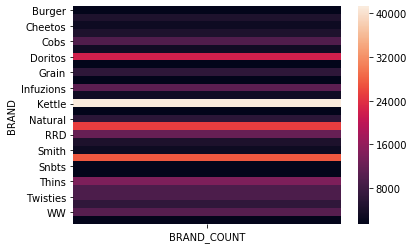

In [37]:
grouped_trans_brand = data_transactions.groupby('BRAND').agg(BRAND_COUNT = ('BRAND', 'count'))
sns.heatmap(grouped_trans_brand)

In [38]:
data_purchase

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


In [39]:
#merge data
merged_data = data_transactions.merge(data_purchase, left_on='LYLTY_CARD_NBR', right_on='LYLTY_CARD_NBR')
merged_data

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,BRAND,PROD_NAME,PACK_SIZE,PROD_QTY,TOT_SALES,MONTHS,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural,Natural Chip Compny SeaSalt,175,2,6.0,10,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs,CCs Nacho Cheese,175,3,6.3,5,MIDAGE SINGLES/COUPLES,Budget
2,2018-11-10,1,1307,346,96,WW,WW Original Stacked Chips,160,2,3.8,11,MIDAGE SINGLES/COUPLES,Budget
3,2019-03-09,1,1307,347,54,CCs,CCs Original,175,1,2.1,3,MIDAGE SINGLES/COUPLES,Budget
4,2019-05-20,1,1343,383,61,Smiths,Smiths Crinkle Cut Chips Chicken,170,2,2.9,5,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...,...,...,...
246735,2019-03-09,272,272319,270088,89,Kettle,Kettle Sweet Chilli And Sour Cream,175,2,10.8,3,YOUNG SINGLES/COUPLES,Premium
246736,2018-08-13,272,272358,270154,74,Tostitos,Tostitos Splash Of Lime,175,1,4.4,8,YOUNG SINGLES/COUPLES,Premium
246737,2018-11-06,272,272379,270187,51,Doritos,Doritos Mexicana,170,2,8.8,11,YOUNG SINGLES/COUPLES,Premium
246738,2018-12-27,272,272379,270188,42,Doritos,Doritos Corn Chip Mexican Jalapeno,150,2,7.8,12,YOUNG SINGLES/COUPLES,Premium


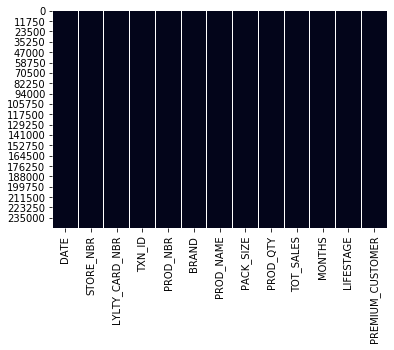

In [40]:
#check for nulls
sns.heatmap(merged_data.isnull(), cbar=False)

In [41]:
#export to csv file
merged_data.to_csv('../Data/QVI_data.csv')

In [42]:
#customer analysis
grouped_lifestage_customer_data = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'], as_index = False).agg({'TOT_SALES' : 'sum'})
grouped_lifestage_customer_data

,LIFESTAGE,PREMIUM_CUSTOMER,TOT_SALES
0,MIDAGE SINGLES/COUPLES,Budget,33345.70
1,MIDAGE SINGLES/COUPLES,Mainstream,84734.25
2,MIDAGE SINGLES/COUPLES,Premium,54443.85
3,NEW FAMILIES,Budget,20607.45
4,NEW FAMILIES,Mainstream,15979.70
5,NEW FAMILIES,Premium,10760.80
6,OLDER FAMILIES,Budget,156863.75
7,OLDER FAMILIES,Mainstream,96413.55
8,OLDER FAMILIES,Premium,75242.60
9,OLDER SINGLES/COUPLES,Budget,127833.60


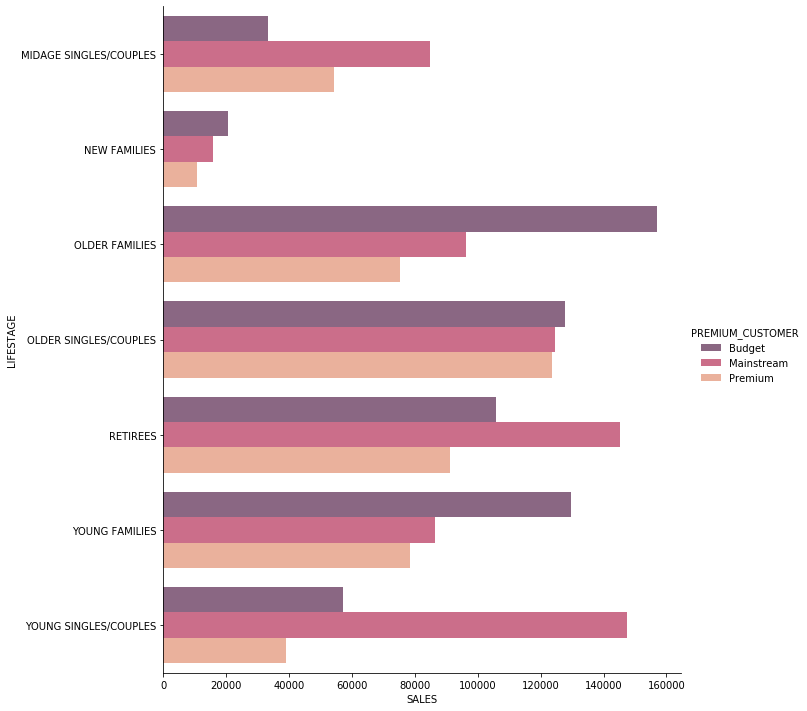

In [44]:
customer_sales_vis = sns.catplot(
    data=grouped_lifestage_customer_data, kind="bar",
    x="TOT_SALES", y="LIFESTAGE", hue="PREMIUM_CUSTOMER",
    ci="sd", palette="rocket", alpha=.7, height=10, 
)
customer_sales_vis.set(xlabel='SALES')

In [45]:
customer_num_per_group = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).agg(CUSTOMER_NUM = ('TOT_SALES', 'count'))
customer_num_per_group

CUSTOMER_NUM
LIFESTAGE              PREMIUM_CUSTOMER              
MIDAGE SINGLES/COUPLES Budget                    4691
                       Mainstream               11095
                       Premium                   7612
NEW FAMILIES           Budget                    2824
                       Mainstream                2185
                       Premium                   1488
OLDER FAMILIES         Budget                   21514
                       Mainstream               13241
                       Premium                  10403
OLDER SINGLES/COUPLES  Budget                   17172
                       Mainstream               17061
                       Premium                  16560
RETIREES               Budget                   14225
                       Mainstream               19970
                       Premium                  12236
YOUNG FAMILIES         Budget                   17763
                       Mainstream               11947
                       Premium                  10784
YOUNG SINGLES/COUPLES  Budget                    8573
                       Mainstream               19544
                       Premium                   5852

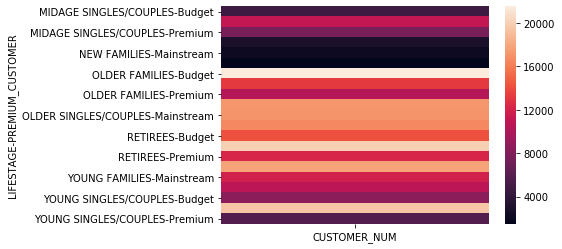

In [46]:
sns.heatmap(customer_num_per_group)

In [47]:
avg_units_per_customer = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).agg(AVG_UNITS = ('PROD_QTY', 'mean'))
avg_units_per_customer

AVG_UNITS
LIFESTAGE              PREMIUM_CUSTOMER           
MIDAGE SINGLES/COUPLES Budget             1.893626
                       Mainstream         1.911942
                       Premium            1.891750
NEW FAMILIES           Budget             1.855878
                       Mainstream         1.858124
                       Premium            1.860887
OLDER FAMILIES         Budget             1.945384
                       Mainstream         1.948795
                       Premium            1.945496
OLDER SINGLES/COUPLES  Budget             1.914920
                       Mainstream         1.911201
                       Premium            1.913949
RETIREES               Budget             1.893286
                       Mainstream         1.886680
                       Premium            1.901438
YOUNG FAMILIES         Budget             1.941226
                       Mainstream         1.941408
                       Premium            1.938149
YOUNG SINGLES/COUPLES  Budget             1.808002
                       Mainstream         1.853510
                       Premium            1.807075

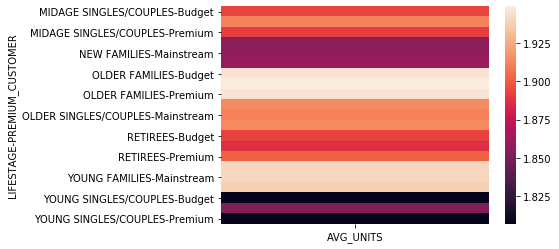

In [48]:
sns.heatmap(avg_units_per_customer)

In [49]:
avg_price_per_unit = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).agg(AVG_PRICE = ('TOT_SALES', 'mean'))
avg_price_per_unit

AVG_PRICE
LIFESTAGE              PREMIUM_CUSTOMER           
MIDAGE SINGLES/COUPLES Budget             7.108442
                       Mainstream         7.637156
                       Premium            7.152371
NEW FAMILIES           Budget             7.297256
                       Mainstream         7.313364
                       Premium            7.231720
OLDER FAMILIES         Budget             7.291241
                       Mainstream         7.281440
                       Premium            7.232779
OLDER SINGLES/COUPLES  Budget             7.444305
                       Mainstream         7.306049
                       Premium            7.459997
RETIREES               Budget             7.445786
                       Mainstream         7.269352
                       Premium            7.461315
YOUNG FAMILIES         Budget             7.302705
                       Mainstream         7.226772
                       Premium            7.285951
YOUNG SINGLES/COUPLES  Budget             6.663023
                       Mainstream         7.551279
                       Premium            6.673325

In [ ]:
sns.heatmap(avg_price_per_unit)

In [50]:
#check if difference is statistically different
anova_test_data = merged_data[['LIFESTAGE', 'PREMIUM_CUSTOMER', 'TOT_SALES']].loc[(merged_data['LIFESTAGE'] == 'MIDAGE SINGLES/COUPLES') | (merged_data['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES')]
anova_test_data['feature'] = anova_test_data['LIFESTAGE'] + ' ' + anova_test_data['PREMIUM_CUSTOMER']
anova_test_data

,LIFESTAGE,PREMIUM_CUSTOMER,TOT_SALES,feature
0,YOUNG SINGLES/COUPLES,Premium,6.0,YOUNG SINGLES/COUPLES Premium
1,MIDAGE SINGLES/COUPLES,Budget,6.3,MIDAGE SINGLES/COUPLES Budget
2,MIDAGE SINGLES/COUPLES,Budget,3.8,MIDAGE SINGLES/COUPLES Budget
3,MIDAGE SINGLES/COUPLES,Budget,2.1,MIDAGE SINGLES/COUPLES Budget
4,MIDAGE SINGLES/COUPLES,Budget,2.9,MIDAGE SINGLES/COUPLES Budget
...,...,...,...,...
246735,YOUNG SINGLES/COUPLES,Premium,10.8,YOUNG SINGLES/COUPLES Premium
246736,YOUNG SINGLES/COUPLES,Premium,4.4,YOUNG SINGLES/COUPLES Premium
246737,YOUNG SINGLES/COUPLES,Premium,8.8,YOUNG SINGLES/COUPLES Premium
246738,YOUNG SINGLES/COUPLES,Premium,7.8,YOUNG SINGLES/COUPLES Premium


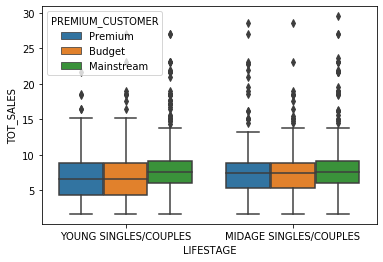

In [51]:
sns.boxplot(x = 'LIFESTAGE', y = 'TOT_SALES', hue = 'PREMIUM_CUSTOMER', data = anova_test_data)

In [52]:
#using ANOVA for testing differences between more than two groups
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('TOT_SALES ~ C(LIFESTAGE) + C(PREMIUM_CUSTOMER) + C(LIFESTAGE):C(PREMIUM_CUSTOMER)', data=anova_test_data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(LIFESTAGE),935.639373,1.0,148.235938,4.641262e-34
C(PREMIUM_CUSTOMER),7482.814558,2.0,592.761520,1.552847e-255
C(LIFESTAGE):C(PREMIUM_CUSTOMER),477.335501,2.0,37.812793,3.880866e-17
Residual,362052.622733,57361.0,NaN,NaN


In [53]:
#check which groups are different with post-hoc test
from statsmodels.stats.multicomp import (pairwise_tukeyhsd, MultiComparison)

MultiComp = MultiComparison(anova_test_data['TOT_SALES'], anova_test_data['feature'])
print(MultiComp.tukeyhsd().summary())

                           Multiple Comparison of Means - Tukey HSD, FWER=0.05                            
              group1                            group2              meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------------------------------------------
    MIDAGE SINGLES/COUPLES Budget MIDAGE SINGLES/COUPLES Mainstream   0.5287  0.001   0.404  0.6534   True
    MIDAGE SINGLES/COUPLES Budget    MIDAGE SINGLES/COUPLES Premium   0.0439    0.9  -0.089  0.1768  False
    MIDAGE SINGLES/COUPLES Budget      YOUNG SINGLES/COUPLES Budget  -0.4454  0.001 -0.5754 -0.3154   True
    MIDAGE SINGLES/COUPLES Budget  YOUNG SINGLES/COUPLES Mainstream   0.4428  0.001  0.3264  0.5592   True
    MIDAGE SINGLES/COUPLES Budget     YOUNG SINGLES/COUPLES Premium  -0.4351  0.001 -0.5754 -0.2948   True
MIDAGE SINGLES/COUPLES Mainstream    MIDAGE SINGLES/COUPLES Premium  -0.4848  0.001 -0.5913 -0.3782   True
MIDAGE SINGLES/COUPLES Mainstream    